In [1]:
import sys
print(sys.version)

3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


In [2]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
#import datetime as dt
import warnings
warnings.filterwarnings('ignore')

### 1. Understand the dataset

In [3]:
#import the required csv file
service_requests_df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv',low_memory=False)                                
service_requests_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


##### Observation:
   1. 311 service requests data csv file is loaded using read_csv 
   2. head() method reads first 5 records from the dataframe

#### 1.1 Shape of Dataset

In [4]:
#retuns the shape of the dataset
service_requests_df.shape

(364558, 53)

##### Observation:
   1. The dataframe has 364558 rows and 53 columns.

#### 1.2 Identify variables with Null Values

In [5]:
#to identify the variables with null values
service_requests_df.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

##### Observation:
   1. Displays the null value count in each column.
   2. It is observed that certain columns has null values in almost all rows. Going forward we will dropping those columns.

#### 1.3 To display the data type of each column

In [6]:
#returns the data type of each column
service_requests_df.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

##### Observation:
   1. Describes the datatype of each column.
   2. It is observed most of the variables have object datatype.
   3. This dataset can be considered as Categorical dataset.

### 2. Basic data exploratory analysis

#### Sanity Checks

In [7]:
#To replace the column names with '_' inplace of empty space

service_requests_df.columns = service_requests_df.columns.str.replace (' ','_')
service_requests_df.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Description', 'Resolution_Action_Updated_Date',
       'Community_Board', 'Borough', 'X_Coordinate_(State_Plane)',
       'Y_Coordinate_(State_Plane)', 'Park_Facility_Name', 'Park_Borough',
       'School_Name', 'School_Number', 'School_Region', 'School_Code',
       'School_Phone_Number', 'School_Address', 'School_City', 'School_State',
       'School_Zip', 'School_Not_Found', 'School_or_Citywide_Complaint',
       'Vehicle_Type', 'Taxi_Company_Borough', 'Taxi_Pick_Up_Location',
       'Bridge_Highway_Name', 'Bridge_Highway_Direction', 'Road_Ramp',
       'Bridge_Highway_Segment', 'Garage_Lot_Name', 'Ferry_

##### Observation:
   1. Replacing the column names with '_' in blank spaces so that the column names can be used easily during analysis.

In [8]:
#To check for any duplicate rows in the dataset

duplicate = service_requests_df[service_requests_df.duplicated()]
duplicate

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location


##### Observation:
   1. No duplicate rows present.

In [9]:
#To change the Incident_Zip datatype to int as Incident_Zip cannot be in float

service_requests_df['Incident_Zip'] = service_requests_df.Incident_Zip.astype('Int64',errors='ignore')
print('Datatype of Incident_Zip column:',service_requests_df['Incident_Zip'].dtypes)
print()
service_requests_df.head(1)

Datatype of Incident_Zip column: Int64



,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"


##### Observation:
   1. Incident zip column has been converted to integer as zip code can't be in float.

In [10]:
#Changing all the city names to Upper case (replaces duplicates of city names if any)
service_requests_df.City = service_requests_df.City.str.upper()
service_requests_df.City = service_requests_df.City.str.replace(' ','_')
service_requests_df.City.unique()

array(['NEW_YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW_GARDENS', 'JACKSON_HEIGHTS', 'MIDDLE_VILLAGE', 'REGO_PARK',
       'SAINT_ALBANS', 'JAMAICA', 'SOUTH_RICHMOND_HILL', nan, 'RIDGEWOOD',
       'HOWARD_BEACH', 'FOREST_HILLS', 'STATEN_ISLAND', 'OZONE_PARK',
       'RICHMOND_HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS_VILLAGE', 'OAKLAND_GARDENS', 'HOLLIS', 'MASPETH',
       'EAST_ELMHURST', 'SOUTH_OZONE_PARK', 'WOODSIDE', 'FRESH_MEADOWS',
       'LONG_ISLAND_CITY', 'ROCKAWAY_PARK', 'SPRINGFIELD_GARDENS',
       'COLLEGE_POINT', 'BAYSIDE', 'GLEN_OAKS', 'FAR_ROCKAWAY',
       'BELLEROSE', 'LITTLE_NECK', 'CAMBRIA_HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL_PARK',
       'NEW_HYDE_PARK', 'CENTRAL_PARK', 'BREEZY_POINT', 'QUEENS'],
      dtype=object)

##### Observation:
   1. Replacing the all the city names to Upper case.
   2. This will replace same city names with lower case to upper case. Hence removing the duplicates.

#### 2.1 Utilize missing value treatment

In [11]:
#Function to evaluate empty column percentage 
def Evaluate_empty_columns_percetange(df):
    null_col_count = df.isna().sum(axis=0).where(lambda x:x>0).dropna()
    columns_to_drop = []
    for column in null_col_count.items():
        if (column[1]/service_requests_df.shape[0] >= 0.30):
            columns_to_drop.append(column[0])
    #df.drop(columns_to_drop,axis=1,inplace=True)
    return columns_to_drop

#Function to drop the columns 
def drop_columns(df):
        drop_empty_columns = Evaluate_empty_columns_percetange(df)
        drop_unnecessary_columns = ['Park_Facility_Name','Descriptor',
                                    'Address_Type','Facility_Type',
                                    'School_Name','Community_Board','X_Coordinate_(State_Plane)',
                                    'Y_Coordinate_(State_Plane)','School_Number',
                                    'School_Region','School_Code',
                                    'School_Phone_Number','School_Address','School_City',
                                    'School_State','School_Zip',
                                    'Incident_Address', 'Street_Name','Cross_Street_1','Cross_Street_2'
                                   ,'Park_Borough', 'School_Not_Found','Location_Type']
        df.drop(drop_empty_columns,axis=1,inplace=True)
        df.drop(drop_unnecessary_columns,axis=1,inplace=True)
        return df

In [12]:
#call the drop_columns function to drop the columns

drop_columns(service_requests_df)
display(service_requests_df.shape)
service_requests_df.columns

(364558, 16)

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Incident_Zip', 'City', 'Status', 'Due_Date',
       'Resolution_Description', 'Resolution_Action_Updated_Date', 'Borough',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

##### Observation:
   1. Unnecessary columns have been removed.
   2. Columns with null value percentage greater than 30% has been removed.
   3. Now the dataset has 364558 rows and 16 columns.
   4. Column count has been reduced from 53 to 16.

In [13]:
#returns only the columns with null values count greater than 0

service_requests_df.isna().sum().where(lambda x:x>0).dropna()

Closed_Date                       2381.0
Incident_Zip                      2998.0
City                              2997.0
Due_Date                             3.0
Resolution_Action_Updated_Date    2402.0
Latitude                          4030.0
Longitude                         4030.0
Location                          4030.0
dtype: float64

##### Observation:
   1. Displays the null value count only for columns having null values.

In [14]:
#dropping rows where city and incident_zip and latitude and longitude are null

rows_to_drop = []
rows_to_drop = service_requests_df.loc[(service_requests_df['City'].isna() & service_requests_df['Incident_Zip'].isna())
                     & (service_requests_df['Location'].isna())].index
display(service_requests_df.shape)
service_requests_df.drop(rows_to_drop,axis=0,inplace=True)
display(service_requests_df.shape)

(364558, 16)

(361602, 16)

##### Observation:
   1. 2956 rows has been dropped where city, incident_zip, latitude, longitude all are null.

In [15]:
#checks for rows where city is null and Incident zip is not null

service_requests_df.loc[(service_requests_df['City'].isna() & service_requests_df['Incident_Zip'].notna()),
                   ['City','Incident_Zip','Location']]

,City,Incident_Zip,Location
42673,NaN,10021,"(40.763813429450074, -73.95332028545567)"
99128,NaN,10021,"(40.763813429450074, -73.95332028545567)"
250540,NaN,10022,"(40.757941922123756, -73.95923329841807)"


##### Observation:
   1. 3 rows has been identified with City value as null where Incident zip and Location are available.

In [16]:
#To find the name of the city for the specified incident zip

print(service_requests_df.loc[service_requests_df['Incident_Zip'] == 10021, 
                              'City'].unique())
print(service_requests_df.loc[service_requests_df['Incident_Zip'] == 10022, 
                              'City'].unique())

['NEW_YORK' nan]
['NEW_YORK' nan]


##### Observation:
   1. Finding the mode value for the above found Incident zip values.

In [17]:
#replacing the city names

service_requests_df.loc[(service_requests_df['City'].isna() & service_requests_df['Incident_Zip'].notna()),
                   ['City']] = 'NEW_YORK'

##### Observation:
   1. Replacing the city names with mode value.

In [18]:
#checks for rows where city is not null and Incident zip is null

service_requests_df.loc[(service_requests_df['Incident_Zip'].isna() & service_requests_df['City'].notna()),
                   ['City','Incident_Zip','Location']]

,City,Incident_Zip,Location
111184,NEW_YORK,<NA>,"(40.75593448141513, -73.99839017174544)"
117502,BRONX,<NA>,"(40.807247184187624, -73.9332273112631)"
218640,BRONX,<NA>,"(40.905915248195186, -73.87802446906798)"
283132,QUEENS,<NA>,NaN


##### Observation:
   1. 4 rows have been identified with incident zip having null value where city and location values are present.

In [19]:
#to check for values that matches the given latitude and city

print(service_requests_df.loc[(service_requests_df.Location == (40.75593448141513, -73.99839017174544)) & (service_requests_df['City'] == 'NEW_YORK'),
                   ['Incident_Zip']])
print(service_requests_df.loc[(service_requests_df['Location'] == (40.807247184187624, -73.9332273112631)) & (service_requests_df['City'] == 'BRONX'),
                   ['Incident_Zip']])
print(service_requests_df.loc[(service_requests_df['Location'] == (40.905915248195186, -73.87802446906798)) & (service_requests_df['City'] == 'BRONX'),
                   ['Incident_Zip']])

Empty DataFrame
Columns: [Incident_Zip]
Index: []
Empty DataFrame
Columns: [Incident_Zip]
Index: []
Empty DataFrame
Columns: [Incident_Zip]
Index: []


##### Observation:
   1. It is observed that for the Location mentioned there is no Incident zip value available in the dataset.

In [20]:
#dropping rows as no respective values are found

row_todrop_index = service_requests_df.loc[(service_requests_df['Incident_Zip'].isna() & service_requests_df['City'].notna())].index
service_requests_df.drop(row_todrop_index, axis=0, inplace=True)

##### Observation:
   1. Hence deleting those 4 rows.

In [21]:
#checks for rows where city is null and Incident zip is null
service_requests_df.loc[(service_requests_df['City'].isna()) & (service_requests_df['Incident_Zip'].isna()),
                   ['Location','City','Incident_Zip']]

,Location,City,Incident_Zip
15584,"(40.60661570687146, -74.04466465645783)",NaN,<NA>
68250,"(40.8048002396494, -73.81250140007404)",NaN,<NA>
68254,"(40.8048002396494, -73.81250140007404)",NaN,<NA>
87700,"(40.70447303426465, -74.00313782378127)",NaN,<NA>
89608,"(40.70447303426465, -74.00313782378127)",NaN,<NA>
94371,"(40.70447303426465, -74.00313782378127)",NaN,<NA>
96165,"(40.76173685644431, -74.00241856253868)",NaN,<NA>
96444,"(40.70447303426465, -74.00313782378127)",NaN,<NA>
102888,"(40.70447303426465, -74.00313782378127)",NaN,<NA>
103794,"(40.76173685644431, -74.00241856253868)",NaN,<NA>


##### Observation:
   1. 38 rows has null values in City and Incident zip column where location details are given.

In [22]:
class FillNanValues:
#Function to determine p-value and perform chi-square test
    def __init__(self, dataframe):
        self.df = dataframe
        
    def _fillClosedDateNullValues(self):   
        self.df.loc[(self.df.Closed_Date.isna() & self.df.Resolution_Action_Updated_Date.notna()),'Closed_Date'] = self.df.Resolution_Action_Updated_Date
        
       

    def _fillResolutionActionUpdatedDateNullValues(self):   
        self.df.loc[(self.df.Closed_Date.notna() & self.df.Resolution_Action_Updated_Date.isna()),'Resolution_Action_Updated_Date'] = self.df.Closed_Date
        


    def _fillDueDateNullValues(self):   
        self.df.loc[(self.df.Due_Date.isna() & self.df.Closed_Date.notna()),'Due_Date'] = self.df.Closed_Date
        #ids = []
        #ids = self.df.loc[(self.df.Due_Date.isna() & self.df.Closed_Date.notna())].index
        #for i in ids:
            #self.df.Due_Date[i] = self.df.Closed_Date[i]
            

    def _fillCityLocationNullValues(self,list1,colX,colY):
        if(colX == 'Location'):
            location = 0
            location_series = []
            index = []
            for i in list1: 
                #To find the most repeating Location value using mode() function
                modeValue  = self.df.loc[self.df[colY] == i, colX].mode() 
                #if the series object is not null                     
                if(modeValue.notna().sum() != 0): 
                    #gets the latitude for the specified Incident_Zip
                    location = modeValue[0]  #gets the location from the 0th index
                    latitude  = self.df.loc[self.df[colY] == i, 'Latitude'].mode()[0] 
                    #gets the longitude for the specified Incident_Zip
                    longitude  = self.df.loc[self.df[colY] == i, 'Longitude'].mode()[0] 
                    #gets the unique_key values to replace the null values
                    ids = self.df.loc[(self.df[colY] == i) & (self.df[colX].isna())].index 
                    #iterates through the list of ids to replace the location,latitude and longitude values
                    for i in ids: 
                        self.df[colX][i] = location
                        self.df['Latitude'][i] = latitude
                        self.df['Longitude'][i] = longitude
                else:
                    print('Location not found for Incident_Zip:',i)

        elif(colX == 'City'):
            city = 0
            zipcode = 0  
            city_series = []
            zip_series = []
            for i in list1: 
                city_series  = self.df.loc[self.df['Location'] == i, colX].mode()
                zip_series = self.df.loc[self.df['Location'] == i, colY].mode()
                if((city_series.isna().sum() != 0) & (zip_series.isna().sum() != 0)):
                    city = lat_series[0]
                    zipcode = long_series[0]
                    index = self.df.loc[(self.df['Location'] == i) & (self.df[colX].isna() & self.df[colY].isna())].index
                    for i in index:
                        self.df[colX][i] = city
                        self.df[colY][i] = zipcode
                else:
                    print('City and Zipcode not found for Location:',i)

#Initializing FillNanValues class
fnv = FillNanValues(service_requests_df)

In [23]:
#gets rows where location is null and Incident zip is not null
incident_zip = service_requests_df.loc[(service_requests_df['Location'].isna() & service_requests_df['Incident_Zip'].notna())]
incident_zip_list = incident_zip['Incident_Zip'].unique().tolist()

#To fill the null values of location,latitude,longitude based on the given Incident_Zip
fnv._fillCityLocationNullValues(list1 = incident_zip_list,colX='Location',colY='Incident_Zip')

Location not found for Incident_Zip: 11241


In [24]:
service_requests_df.Incident_Zip.unique()

<IntegerArray>
[10034, 11105, 10458, 10461, 11373, 11215, 10032, 10457, 11415, 11219,
 ...
 10041, 11242, 10119, 10048, 10803, 11695, 10111, 10162, 10123, 11241]
Length: 202, dtype: Int64

In [25]:
#service_requests_df.loc[(service_requests_df['Incident_Zip']),'City'] = 11241

##### Observation:
   1. Calling the _fillCityLocationNullValues function available in FillNullValues class to fill the null values in Location, Latitude and Longitude.
   2. It is observed that Location is not found for zip code 11241. So, we can delete this row.

In [26]:
#Finding the index of the row to be dropped.
service_requests_df.loc[(service_requests_df.Latitude.isna() & service_requests_df.Longitude.isna()) & service_requests_df.Location.isna()].index

Int64Index([296896], dtype='int64')

In [27]:
#Dropping the row
service_requests_df.drop(296896, axis = 0, inplace = True)

In [28]:
location_df = service_requests_df.loc[(service_requests_df['City'].isna()) & (service_requests_df['Incident_Zip'].isna())]
location_list = location_df['Location'].unique().tolist()

#To fill the null values of City and Incident_Zip based on given Location
fnv._fillCityLocationNullValues(list1 = location_list,colX='City',colY='Incident_Zip')

City and Zipcode not found for Location: (40.60661570687146, -74.04466465645783)
City and Zipcode not found for Location: (40.8048002396494, -73.81250140007404)
City and Zipcode not found for Location: (40.70447303426465, -74.00313782378127)
City and Zipcode not found for Location: (40.76173685644431, -74.00241856253868)
City and Zipcode not found for Location: (40.76345230347771, -74.00312977272966)
City and Zipcode not found for Location: (40.580984234810536, -74.0726053177751)
City and Zipcode not found for Location: (40.705713689710294, -74.00219291076448)
City and Zipcode not found for Location: (40.706084211098755, -73.9968657071603)
City and Zipcode not found for Location: (40.86270837429395, -73.91473732890543)


##### Observation:
   1. Calling the _fillCityLocationNullValues function available in FillNullValues class to fill the null values in City and Incident_Zip.
   2. It is observed that for the Location available there is no City or Zipcode present.So, deleting those rows.

In [29]:
#Deleting the rows where City and Incident_Zip is null and Location is not null.
drop_rows = service_requests_df.loc[(service_requests_df['Location'].notna()) & 
                                    (service_requests_df['City'].isna() & service_requests_df['Incident_Zip'].isna())].index
service_requests_df.drop(drop_rows,axis = 0,inplace = True)

In [30]:
#Checking for available null values.
service_requests_df.isna().sum().where(lambda x:x>0).dropna()

Closed_Date                       58.0
Due_Date                           1.0
Resolution_Action_Updated_Date    80.0
dtype: float64

##### Observation:
   1. Only 3 date columns has null values.

#### 2.2 Analyze the date column and remove the entries if it has an incorrect timeline

In [31]:
#converting Created date column to datetime datatype
service_requests_df['Created_Date'] = pd.to_datetime (service_requests_df['Created_Date'], 
                                                      infer_datetime_format=True)
display(service_requests_df['Created_Date'].head(1))

0   2015-12-31 23:59:45
Name: Created_Date, dtype: datetime64[ns]

In [32]:
#converting Closed date column to datetime datatype
service_requests_df['Closed_Date'] = pd.to_datetime (service_requests_df['Closed_Date'], 
                                                     infer_datetime_format=True)
display(service_requests_df['Closed_Date'].head(1))

0   2016-01-01 00:55:15
Name: Closed_Date, dtype: datetime64[ns]

In [33]:
#converting Resolution Action Updated Date column to datetime datatype
service_requests_df['Resolution_Action_Updated_Date'] = pd.to_datetime (service_requests_df['Resolution_Action_Updated_Date'],
                                                                        infer_datetime_format=True)
display(service_requests_df['Resolution_Action_Updated_Date'].head(1))

0   2016-01-01 00:55:15
Name: Resolution_Action_Updated_Date, dtype: datetime64[ns]

In [34]:
#converting Due Date column to datetime datatype
service_requests_df['Due_Date'] = pd.to_datetime (service_requests_df['Due_Date'],
                                                  infer_datetime_format=True)
display(service_requests_df['Due_Date'].head(1))

0   2016-01-01 07:59:45
Name: Due_Date, dtype: datetime64[ns]

##### Observation:
   1. Converting the Created_Date, Closed_Date, Resolution_Action_Updated_Date, Due_Date from object datatype to datetime.

In [35]:
fnv._fillClosedDateNullValues()
fnv._fillResolutionActionUpdatedDateNullValues()
fnv._fillDueDateNullValues()
service_requests_df.isna().sum().where(lambda x:x>0).dropna()

Closed_Date                       41.0
Resolution_Action_Updated_Date    41.0
dtype: float64

##### Observation:
   1. Calling the _fillClosedDateNullValues function available in FillNullValues class to fill the null values in Closed date.
   2. Calling the _fillResolutionActionUpdatedDateNullValues function available in FillNullValues class to fill the null values in Resolution Action Updated date.
   3. Calling the _fillDueDateNullValues function available in FillNullValues class to fill the null values in Due date.
   4. Finally printing the null value count present.
   5. Null values in Closed and Resolution Action Updated date is because the Status is still open. So not updating the null values.

In [36]:
#Updating the Status to Closed where both Created date and Resolution Action Updated Date is available
service_requests_df.loc[(service_requests_df.Closed_Date.notna() & service_requests_df.Resolution_Action_Updated_Date.notna()),
                        'Status']='Closed'

##### Observation:
   1. Status has been updated to Closed where Closed Date and Resolution Action Updated Date are not null.

#### Calculating average response time across various types of complaints

In [37]:
#calculating response time/request closing time for each record.
service_requests_df['Request_Closing_Time'] = service_requests_df['Closed_Date']-service_requests_df['Created_Date']
service_requests_df['Request_Closing_Time_mins'] = service_requests_df['Request_Closing_Time']/np.timedelta64(1,'m')
service_requests_df.head(2)

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Incident_Zip,City,Status,Due_Date,Resolution_Description,Resolution_Action_Updated_Date,Borough,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_mins
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,10034,NEW_YORK,Closed,2016-01-01 07:59:45,The Police Department responded and upon arriv...,2016-01-01 00:55:15,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:30,55.500000
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,11105,ASTORIA,Closed,2016-01-01 07:59:44,The Police Department responded to the complai...,2016-01-01 01:26:57,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:13,87.216667


##### Observation:
   1. Request closing time in datetime and Request Closing Time in minutes has been calculated for every record.

#### Other Inferences

In [38]:
service_requests_df.Status.value_counts()

Closed      361518
Open            28
Assigned        12
Draft            1
Name: Status, dtype: int64

##### Observation:
   1. It is observed status of maximum no.of complaints is closed.
   2. Only very few complaints are in open or assigned or draft status.
   2. Except for closed status, remaining categories have closed date and resolution action updated date as null.

In [39]:
pd.crosstab(service_requests_df['Complaint_Type'],service_requests_df['Status'])

Status,Assigned,Closed,Draft,Open
Complaint_Type,,,,
Animal Abuse,0,10529,0,0
Bike/Roller/Skate Chronic,0,472,0,0
Blocked Driveway,2,100542,0,4
Derelict Vehicle,0,21456,0,4
Disorderly Youth,0,315,0,0
Drinking,0,1401,0,0
Graffiti,0,157,0,0
Homeless Encampment,0,4878,0,0
Illegal Fireworks,0,172,0,0


##### Observation:
   1. The crosstab() function is used to compute a simple cross tabulation of two (or more) factors.
   2. Here we are computing complaint type and status.
   3. It is observed that Blocked Driveway and Illegal Parking has maximum no.of closed complaints.
   4. Out of the open complaints count Noise-Commercial has maximum complaints with open status. 

<AxesSubplot:xlabel='Complaint_Type'>

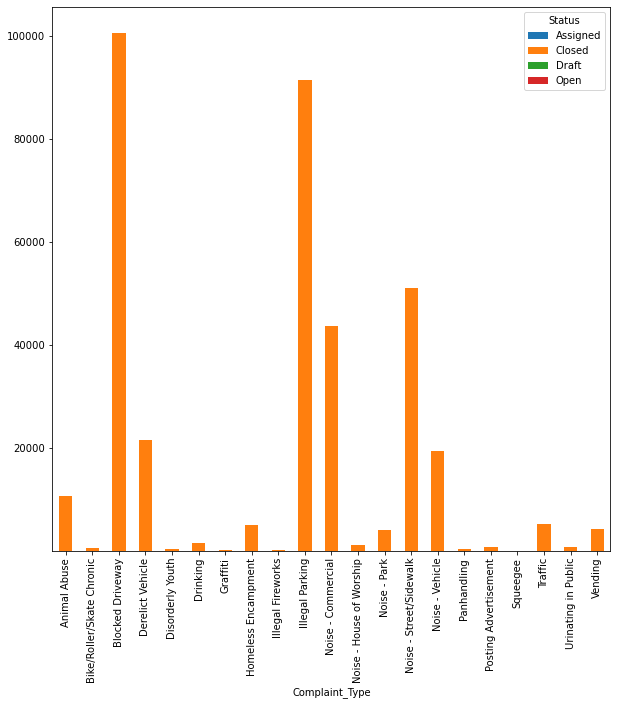

In [40]:
pd.crosstab(service_requests_df['Complaint_Type'],service_requests_df['Status']).plot(kind='bar',stacked=True, figsize=(10,10))

##### Observation:
   1. The bar shows the count of closed complaints for each complaint type.
   2. As the open/assigned/draft status are negligible, it is shown in the bar.

In [41]:
#To display bourogh wise complaints type
borough_wise_complaints_df = service_requests_df.groupby(['Complaint_Type','Borough']).size().unstack().fillna(0)
borough_wise_complaints_df

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
Complaint_Type,,,,,,
Animal Abuse,1971.0,3191.0,1941.0,2640.0,786.0,0.0
Bike/Roller/Skate Chronic,22.0,123.0,254.0,63.0,10.0,0.0
Blocked Driveway,17063.0,36447.0,2707.0,41486.0,2845.0,0.0
Derelict Vehicle,2403.0,6260.0,694.0,9919.0,2184.0,0.0
Disorderly Youth,66.0,79.0,81.0,64.0,25.0,0.0
Drinking,206.0,291.0,321.0,395.0,188.0,0.0
Graffiti,15.0,60.0,25.0,51.0,6.0,0.0
Homeless Encampment,274.0,948.0,3062.0,517.0,77.0,0.0
Illegal Fireworks,24.0,61.0,38.0,38.0,11.0,0.0


##### Observation:
   1. Here we are computing complaints registered across each borough.

In [42]:
service_requests_df.loc[(service_requests_df['Borough'] == 'Unspecified') & (service_requests_df['City'] == 'STATEN_ISLAND') , 
                        'Borough'] = 'STATEN ISLAND'

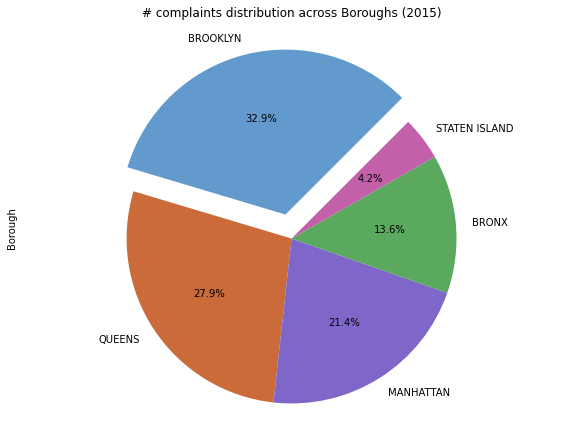

In [43]:
colors = ['#639ace','#ca6b39','#7f67ca','#5ba85f','#c360aa','#a7993f','#cc566a']
service_requests_df['Borough'].value_counts().plot(kind='pie',autopct='%1.1f%%',
                        explode = (0.15, 0, 0, 0, 0),startangle=45, shadow=False, colors = colors,
                        figsize = (8,6))
#plt.legend(title='BOROUGH', loc='upper right', bbox_to_anchor=(1.5,1))
plt.axis('equal')
plt.title('# complaints distribution across Boroughs (2015)\n')
plt.tight_layout()
plt.show()

##### Observation:
   1. It is observed that Brooklyn borough has maximum no.of complaints registered.

<AxesSubplot:ylabel='Complaint_Type'>

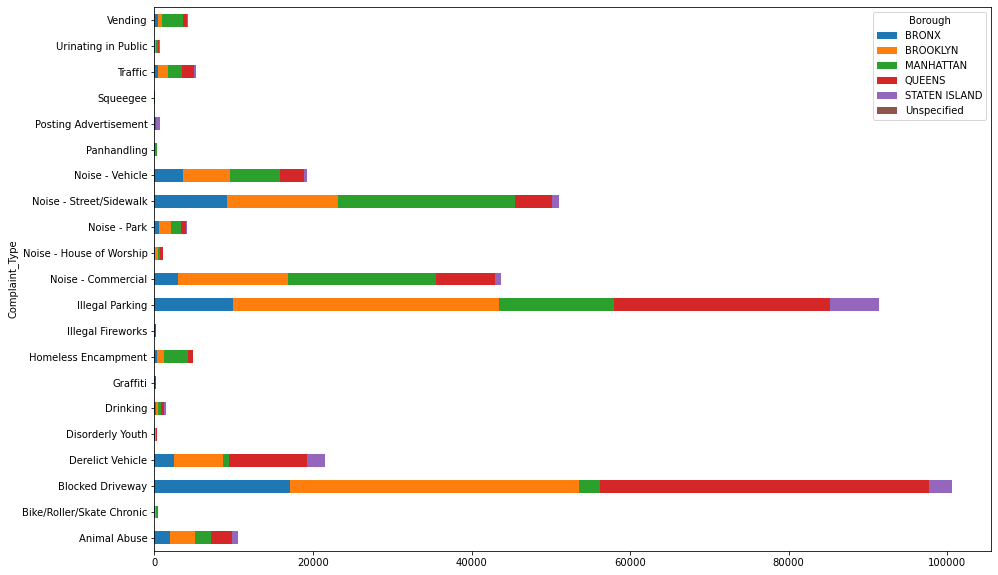

In [44]:
borough_wise_complaints_df.plot(kind='barh',stacked=True, figsize=(15,10))

##### Observation:
   1. The stacked bar plot shows complaints registered across each borough.
   2. It is seen that Brooklyn and Manhattan borough has almost has all types of complaints registered.

In [45]:
service_requests_df.Agency.groupby(service_requests_df['Complaint_Type']).value_counts()

Complaint_Type             Agency
Animal Abuse               NYPD       10529
Bike/Roller/Skate Chronic  NYPD         472
Blocked Driveway           NYPD      100548
Derelict Vehicle           NYPD       21460
Disorderly Youth           NYPD         315
Drinking                   NYPD        1401
Graffiti                   NYPD         157
Homeless Encampment        NYPD        4878
Illegal Fireworks          NYPD         172
Illegal Parking            NYPD       91412
Noise - Commercial         NYPD       43686
Noise - House of Worship   NYPD        1068
Noise - Park               NYPD        4083
Noise - Street/Sidewalk    NYPD       51054
Noise - Vehicle            NYPD       19294
Panhandling                NYPD         324
Posting Advertisement      NYPD         680
Squeegee                   NYPD           4
Traffic                    NYPD        5196
Urinating in Public        NYPD         641
Vending                    NYPD        4185
Name: Agency, dtype: int64

##### Observation:
   1. It is observed all the complaint types are handled by New York City Police Department(NYPD).

#### 2.3 Frequency plot for city-wise complaints

In [46]:
#Display the types of complaints in each city in a separate dataset
city_wise_complaints_df = pd.crosstab(service_requests_df.City,service_requests_df.Complaint_Type)
city_wise_complaints_df

Complaint_Type,Animal Abuse,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,46,0,50,32,2,1,1,4,0,62,...,14,2,29,10,1,0,0,1,1,1
ASTORIA,170,16,3595,440,5,43,4,32,4,1617,...,21,64,554,236,2,3,0,60,10,57
BAYSIDE,53,0,514,231,2,1,3,2,0,638,...,3,4,17,24,0,0,0,9,0,2
BELLEROSE,15,1,138,120,2,1,0,1,1,132,...,1,1,13,11,1,1,0,9,1,0
BREEZY_POINT,2,0,3,3,0,1,0,0,0,16,...,0,0,1,1,0,0,0,0,0,0
BRONX,1971,22,17063,2403,66,206,15,274,24,9889,...,90,548,9146,3556,20,18,0,426,54,433
BROOKLYN,3191,123,36447,6259,79,291,60,948,61,33533,...,389,1575,13984,5966,49,58,0,1258,155,575
CAMBRIA_HEIGHTS,15,0,177,148,0,0,0,6,1,113,...,2,0,29,100,0,0,0,7,0,0
CENTRAL_PARK,0,0,0,0,0,0,0,0,0,5,...,0,0,105,0,0,0,0,0,0,0


##### Observation:
   1. The crosstab() function is used to compute a simple cross tabulation of two (or more) factors.
   2. Here we are computing complaint type and city.
   3. From the above table it is observed Brooklyn city has maximum no.of complaints registered.

Text(0.5, 1.0, 'No.of Complaints Vs City')

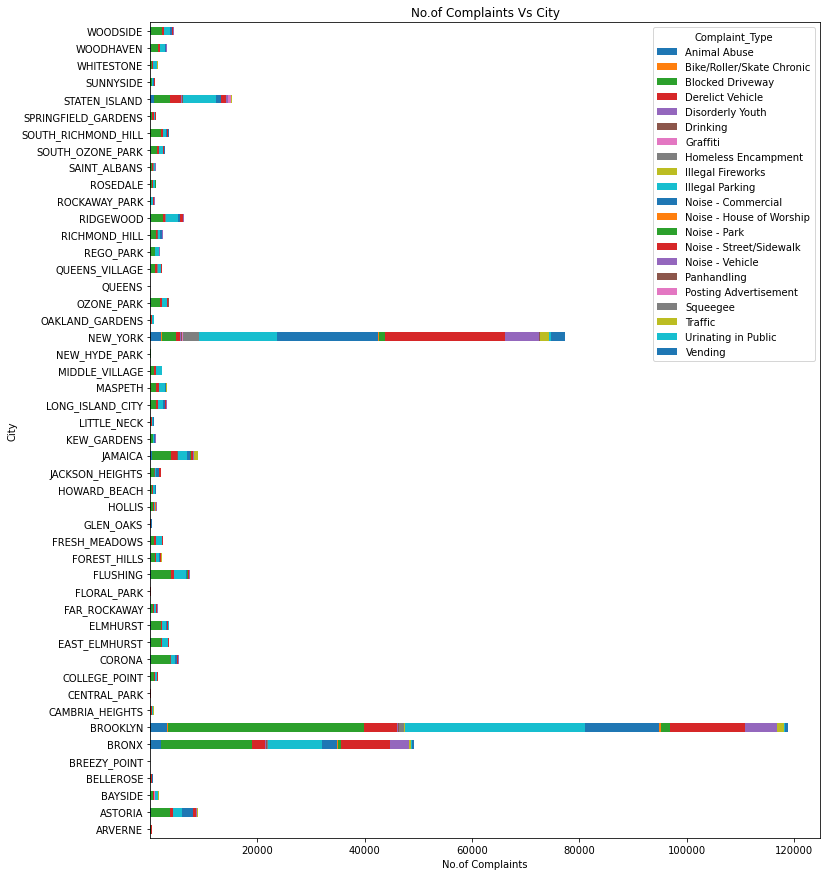

In [47]:
#Draw a frequency plot for city-wise complaints
city_wise_complaints_df.plot.barh(figsize=(12,15),stacked=True)
plt.xlabel('No.of Complaints')
plt.title('No.of Complaints Vs City')

##### Observation:
   1. It is Stacked bar chart.
   2. Bar chart has been plotted for various types of complaints registered in each city.
   3. It is observed the top 3 cities with maximum no.of complaints registered are New York, Brooklyn and Bronx.
   4. It is also inferred that Brooklyn has Blocked Driveway and Illegal Parking as high no.of complaints registered.
   5. In New York it is Noise-Commercial and Noise-Street/Sidewalk complaints with large count.

#### 2.4 Draw scatter and hexbin plots for complaint concentration across Brooklyn

In [48]:
#Different types of complaints registered across brooklyn city and its count
df_brooklyn_complaintTypes = service_requests_df[service_requests_df['City']=='BROOKLYN']
df_brooklyn_complaintTypes

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Incident_Zip,City,Status,Due_Date,Resolution_Description,Resolution_Action_Updated_Date,Borough,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_mins
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:11,NYPD,New York City Police Department,Illegal Parking,11215,BROOKLYN,Closed,2016-01-01 07:56:30,The Police Department responded and upon arriv...,2016-01-01 01:50:11,BROOKLYN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)",0 days 01:53:41,113.683333
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:40,NYPD,New York City Police Department,Blocked Driveway,11219,BROOKLYN,Closed,2016-01-01 07:53:58,The Police Department responded and upon arriv...,2016-01-01 01:17:40,BROOKLYN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)",0 days 01:23:42,83.700000
13,32305074,2015-12-31 23:47:58,2016-01-01 08:18:47,NYPD,New York City Police Department,Illegal Parking,11208,BROOKLYN,Closed,2016-01-01 07:47:58,The Police Department responded to the complai...,2016-01-01 08:18:47,BROOKLYN,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)",0 days 08:30:49,510.816667
17,32310273,2015-12-31 23:44:52,2016-01-01 00:36:10,NYPD,New York City Police Department,Noise - Commercial,11217,BROOKLYN,Closed,2016-01-01 07:44:52,The Police Department responded to the complai...,2016-01-01 00:36:10,BROOKLYN,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)",0 days 00:51:18,51.300000
18,32306617,2015-12-31 23:40:59,2016-01-01 02:37:28,NYPD,New York City Police Department,Noise - Commercial,11234,BROOKLYN,Closed,2016-01-01 07:40:59,The Police Department responded to the complai...,2016-01-01 02:37:28,BROOKLYN,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)",0 days 02:56:29,176.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364539,29608505,2015-01-01 00:23:55,2015-01-01 02:58:38,NYPD,New York City Police Department,Blocked Driveway,11201,BROOKLYN,Closed,2015-01-01 08:23:55,The Police Department responded and upon arriv...,2015-01-01 02:58:38,BROOKLYN,40.691248,-73.984375,"(40.69124772858873, -73.98437529459297)",0 days 02:34:43,154.716667
364541,29612697,2015-01-01 00:19:22,2015-01-01 02:41:10,NYPD,New York City Police Department,Blocked Driveway,11211,BROOKLYN,Closed,2015-01-01 08:19:22,The Police Department responded and upon arriv...,2015-01-01 02:41:10,BROOKLYN,40.713613,-73.956966,"(40.71361332917013, -73.95696623841229)",0 days 02:21:48,141.800000
364544,29613295,2015-01-01 00:17:48,2015-01-01 03:24:48,NYPD,New York City Police Department,Noise - Commercial,11217,BROOKLYN,Closed,2015-01-01 08:17:48,The Police Department responded to the complai...,2015-01-01 03:24:48,BROOKLYN,40.680352,-73.974766,"(40.68035202521423, -73.97476587888686)",0 days 03:07:00,187.000000
364545,29613456,2015-01-01 00:17:47,2015-01-01 00:51:13,NYPD,New York City Police Department,Blocked Driveway,11237,BROOKLYN,Closed,2015-01-01 08:17:47,The Police Department issued a summons in resp...,2015-01-01 00:51:13,BROOKLYN,40.692384,-73.904011,"(40.692383519190834, -73.90401080101479)",0 days 00:33:26,33.433333


##### Observation:
   1. The above table shows only the complaints registered in brooklyn.

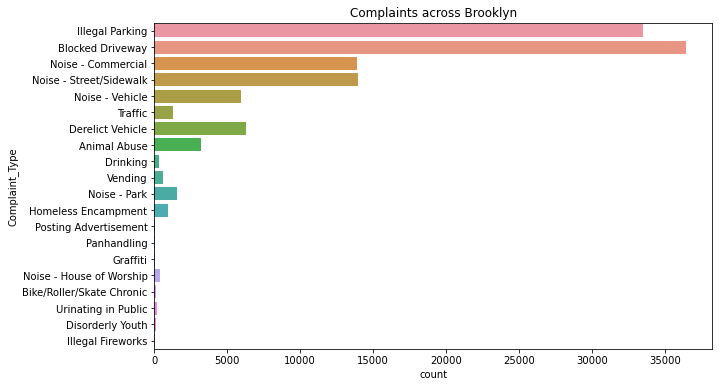

In [49]:
plt.figure(figsize=(10,6))
plt.title('Complaints across Brooklyn')
sns.countplot(y='Complaint_Type', data = df_brooklyn_complaintTypes) 
plt.show()

##### Observation:
   1. Count plot is plotted to show the count of various complaint type registered in brooklyn.
   2. The top 5 complaints registered are 
       - Illegal Parking
       - Blocked Driveway
       - Noise-Commercial and Noise-street/Sidewalk has same count.
       - Noise vehicle
       - Delirict vehicle

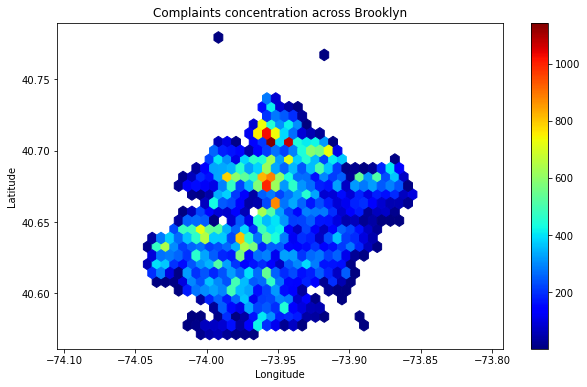

In [50]:
#Hex plot
fig, ax = plt.subplots()
df_brooklyn_complaintTypes.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=30,
    colormap = 'jet',mincnt=1,title = 'Complaints concentration across Brooklyn', 
                                figsize=(10,6), ax=ax).axis('equal')
ax.set_xlabel("Longitude")
plt.show()

##### Observation:
   1. Hexbin plot is used to plot 2 numeric variables.
   2. We are using Latitude and Longitude to plot the complaint concentration across brooklyn.
   3. Darker colors signify more points.

(-74.05061403028367, -73.84647934348564, 40.561126853754885, 40.78979838623255)

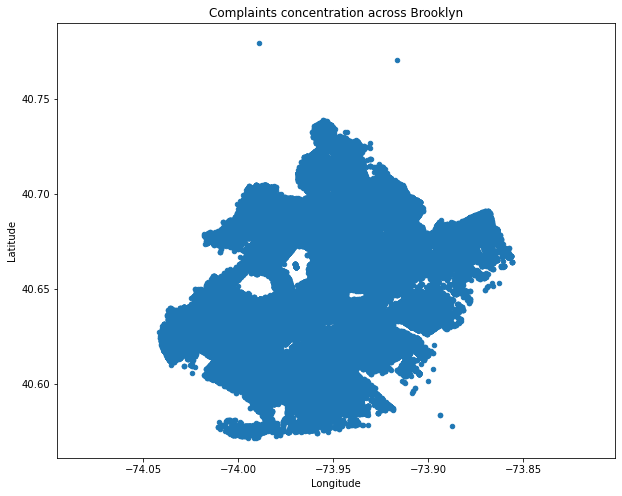

In [51]:
#Scatter plot
df_brooklyn_complaintTypes.plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(10,8),title = 'Complaints concentration across Brooklyn').axis('equal')

##### Observation:
   1. Scatter plot is used to plot 2 numeric variables.
   2. We are using Latitude and Longitude to plot the complaint concentration across brooklyn.
   3. It is observed that complaint count is distributed widely across brooklyn.

### 3. Find major types of complaints

#### 3.1 Plot a bar graph of count vs. complaint types

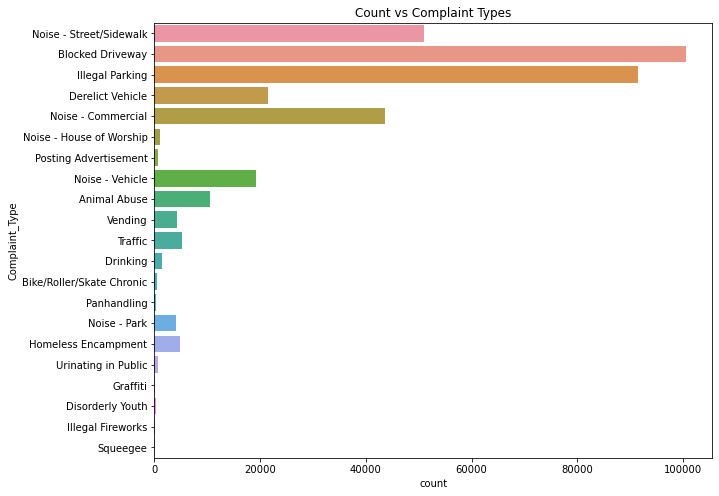

In [52]:
#Count plot
plt.figure(figsize = (10,8))
plt.title('Count vs Complaint Types')
sns.countplot(y = 'Complaint_Type', data = service_requests_df)
plt.show()

##### Observation:
   1. Count plot to plot count of each complaint type registered.

#### 3.2 Find the top 10 types of complaints

In [53]:
#group by complaint type and find the top 10 complaints
complaint_type_count=service_requests_df['Complaint_Type'].value_counts()
print("Top 10 Complaints:")
complaint_type_count.head(10)

Top 10 Complaints:


Blocked Driveway           100548
Illegal Parking             91412
Noise - Street/Sidewalk     51054
Noise - Commercial          43686
Derelict Vehicle            21460
Noise - Vehicle             19294
Animal Abuse                10529
Traffic                      5196
Homeless Encampment          4878
Vending                      4185
Name: Complaint_Type, dtype: int64

##### Observation:
   1. Shows the top 10 type of complaints registered.

<AxesSubplot:>

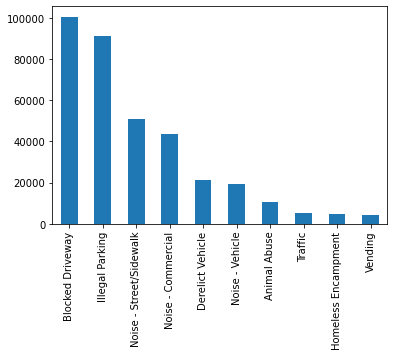

In [54]:
#Bar plot to plot top 10 complaint types
complaint_type_count.head(10).plot(kind='bar')

##### Observation:
   1. Bar graph to easily the visualize the count in each complaint type.

#### 3.3 Display the types of complaints in each city in a separate dataset

In [55]:
cities = service_requests_df['City'].unique()

for i in range(len(cities)):
       exec("df_{} = service_requests_df.loc[(service_requests_df['City'] == '{}',['Complaint_Type','Created_Date','Closed_Date','Request_Closing_Time_mins'])]".format(cities[i],cities[i]))

##### Observation:
   1. exec function executes the dynamically created program.
   2. Here we are storing the details of Complaint type, its created, closed and request closing time for each city and stored in seperate dataframes.

In [56]:
#Displays the types of complaints in New york city
df_NEW_YORK

,Complaint_Type,Created_Date,Closed_Date,Request_Closing_Time_mins
0,Noise - Street/Sidewalk,2015-12-31 23:59:45,2016-01-01 00:55:15,55.500000
6,Illegal Parking,2015-12-31 23:55:32,2016-01-01 01:53:54,118.366667
19,Noise - Street/Sidewalk,2015-12-31 23:40:55,2016-01-01 00:28:31,47.600000
23,Illegal Parking,2015-12-31 23:32:46,2016-01-01 00:25:21,52.583333
26,Noise - House of Worship,2015-12-31 23:26:41,2015-12-31 23:53:31,26.833333
...,...,...,...,...
364542,Noise - Street/Sidewalk,2015-01-01 00:19:20,2015-01-01 03:17:10,177.833333
364543,Noise - Street/Sidewalk,2015-01-01 00:18:49,2015-01-01 03:17:11,178.366667
364547,Noise - Street/Sidewalk,2015-01-01 00:15:33,2015-01-01 00:56:37,41.066667
364552,Noise - Street/Sidewalk,2015-01-01 00:05:05,2015-01-01 01:22:10,77.083333


In [57]:
service_requests_df['City'].unique()

array(['NEW_YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW_GARDENS', 'JACKSON_HEIGHTS', 'MIDDLE_VILLAGE', 'REGO_PARK',
       'SAINT_ALBANS', 'JAMAICA', 'SOUTH_RICHMOND_HILL', 'RIDGEWOOD',
       'HOWARD_BEACH', 'FOREST_HILLS', 'STATEN_ISLAND', 'OZONE_PARK',
       'RICHMOND_HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS_VILLAGE', 'OAKLAND_GARDENS', 'HOLLIS', 'MASPETH',
       'EAST_ELMHURST', 'SOUTH_OZONE_PARK', 'WOODSIDE', 'FRESH_MEADOWS',
       'LONG_ISLAND_CITY', 'ROCKAWAY_PARK', 'SPRINGFIELD_GARDENS',
       'COLLEGE_POINT', 'BAYSIDE', 'GLEN_OAKS', 'FAR_ROCKAWAY',
       'BELLEROSE', 'LITTLE_NECK', 'CAMBRIA_HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL_PARK',
       'NEW_HYDE_PARK', 'CENTRAL_PARK', 'BREEZY_POINT', 'QUEENS'],
      dtype=object)

In [58]:
#Displays the types of complaints in South Richmond hill city
df_SOUTH_RICHMOND_HILL

,Complaint_Type,Created_Date,Closed_Date,Request_Closing_Time_mins
27,Blocked Driveway,2015-12-31 23:26:35,2016-01-01 05:07:29,340.900000
115,Illegal Parking,2015-12-31 22:11:31,2016-01-01 08:28:39,617.133333
237,Blocked Driveway,2015-12-31 18:52:26,2015-12-31 19:57:51,65.416667
420,Blocked Driveway,2015-12-31 14:13:53,2015-12-31 20:04:20,350.450000
433,Blocked Driveway,2015-12-31 13:52:49,2015-12-31 16:13:26,140.616667
...,...,...,...,...
364018,Noise - Street/Sidewalk,2015-01-01 20:51:31,2015-01-01 21:42:04,50.550000
364028,Blocked Driveway,2015-01-01 20:35:25,2015-01-01 23:14:26,159.016667
364264,Illegal Parking,2015-01-01 10:47:41,2015-01-01 14:15:41,208.000000
364285,Illegal Parking,2015-01-01 10:00:10,2015-01-01 14:16:44,256.566667


In [59]:
#Displays the types of complaints in Little neck city
df_LITTLE_NECK

,Complaint_Type,Created_Date,Closed_Date,Request_Closing_Time_mins
1009,Blocked Driveway,2015-12-30 21:48:04,2015-12-30 23:14:22,86.300000
1026,Illegal Parking,2015-12-30 21:16:39,2015-12-30 23:12:14,115.583333
1321,Traffic,2015-12-30 13:58:08,2015-12-30 15:23:17,85.150000
1706,Blocked Driveway,2015-12-30 00:54:02,2015-12-30 01:53:44,59.700000
1999,Derelict Vehicle,2015-12-29 18:13:01,2015-12-29 23:19:57,306.933333
...,...,...,...,...
361484,Illegal Parking,2015-01-05 13:37:46,2015-01-05 15:56:51,139.083333
361693,Blocked Driveway,2015-01-05 08:16:02,2015-01-05 09:27:22,71.333333
362104,Derelict Vehicle,2015-01-04 16:24:48,2015-01-04 23:03:00,398.200000
362196,Blocked Driveway,2015-01-04 13:28:58,2015-01-04 14:54:37,85.650000


### 4. Visualize the major types of complaints in each city

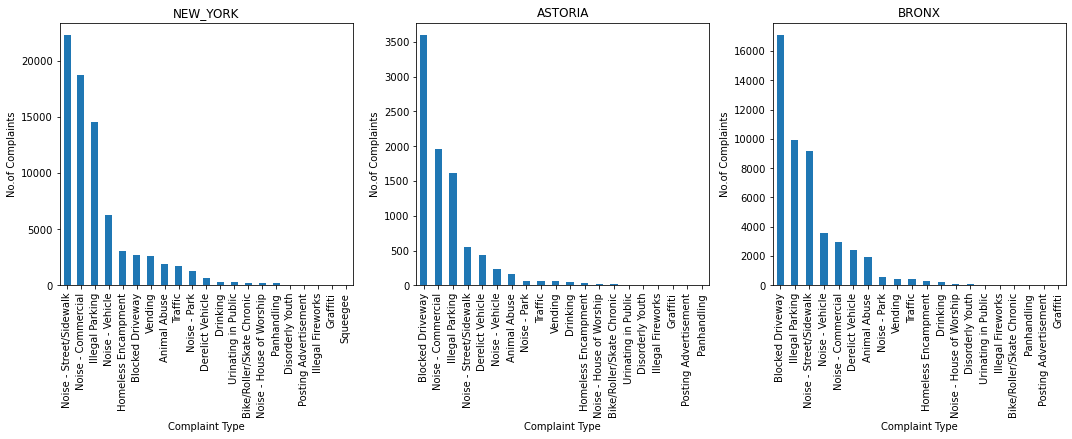

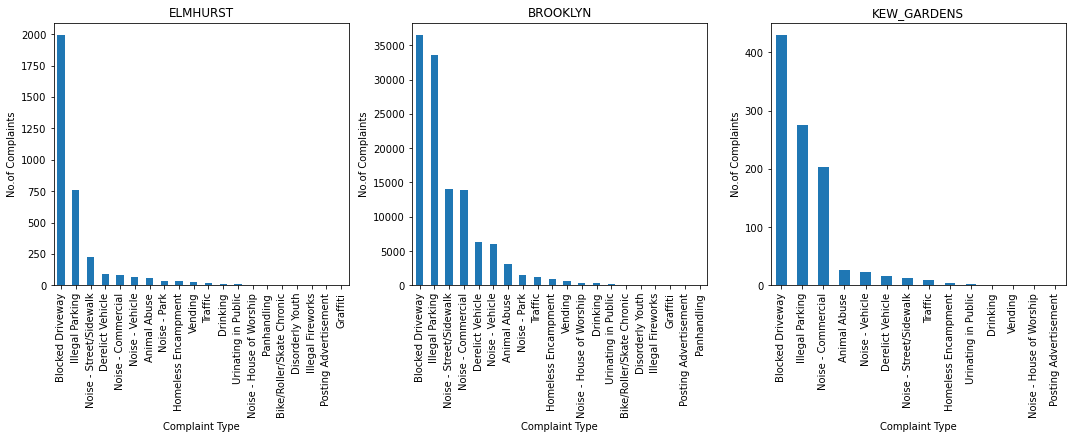

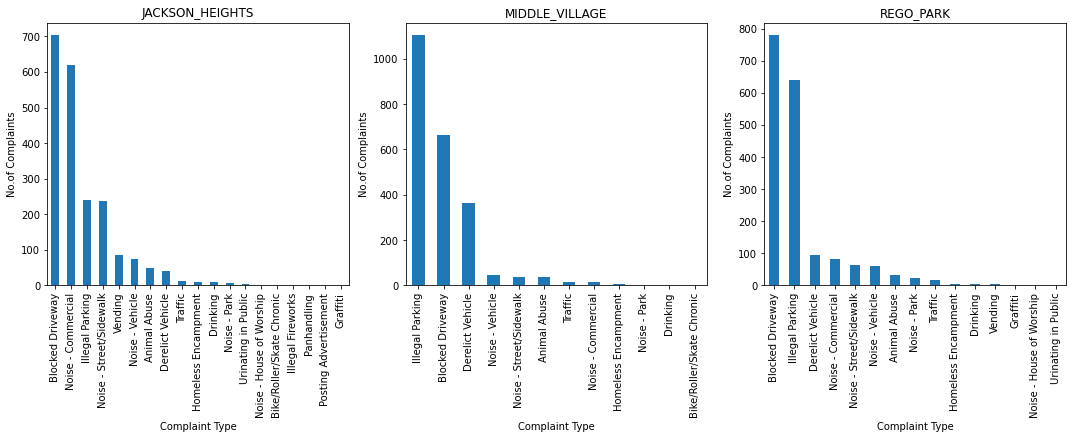

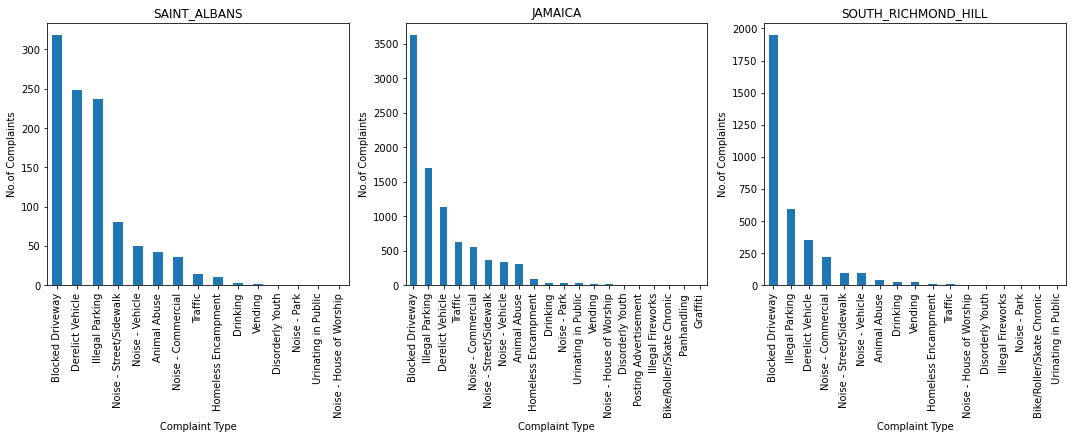

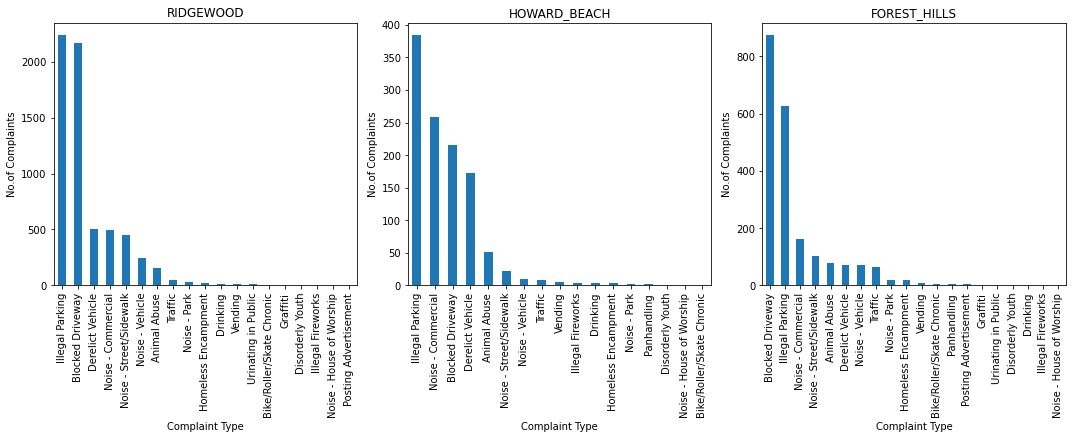

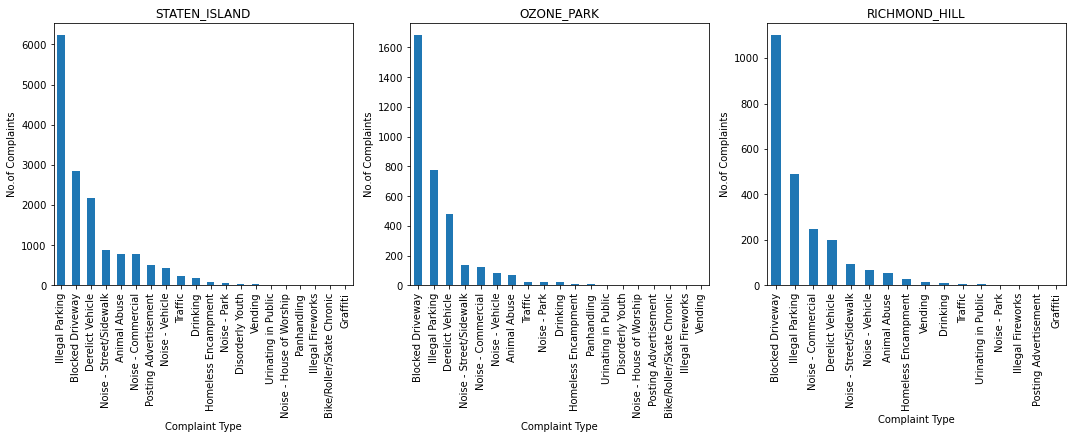

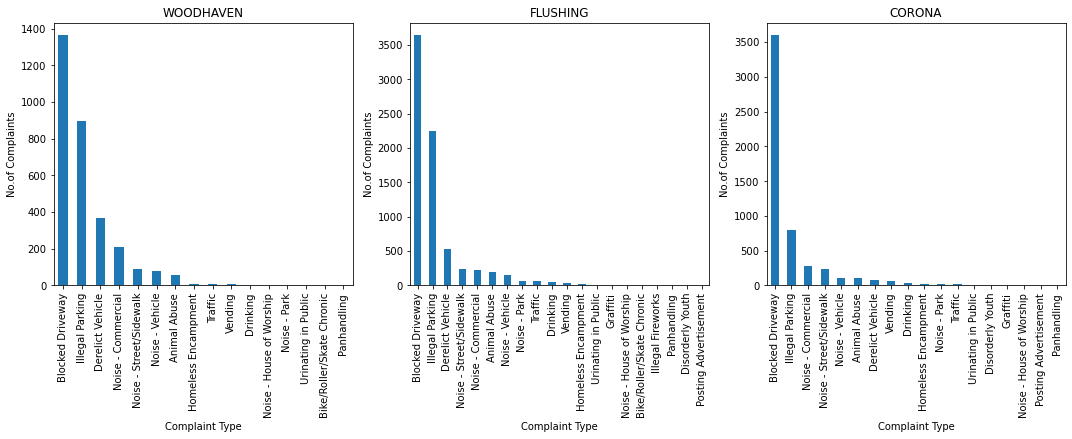

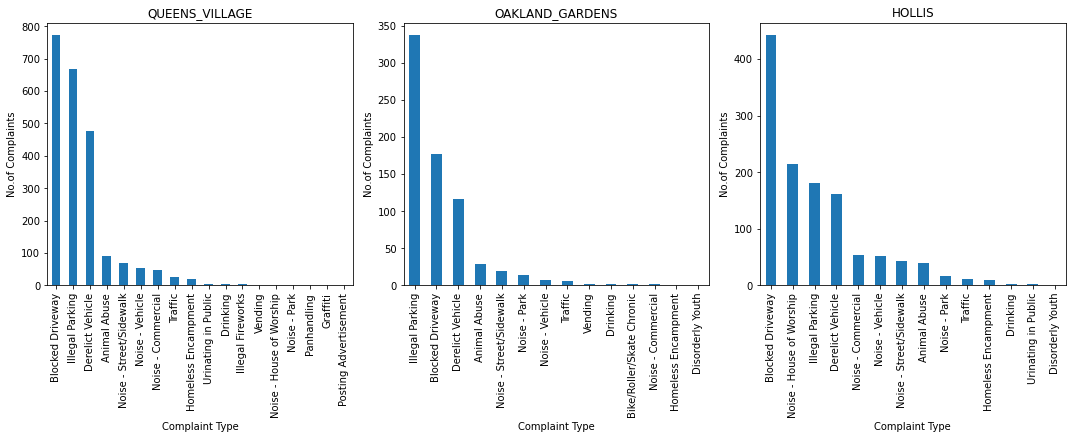

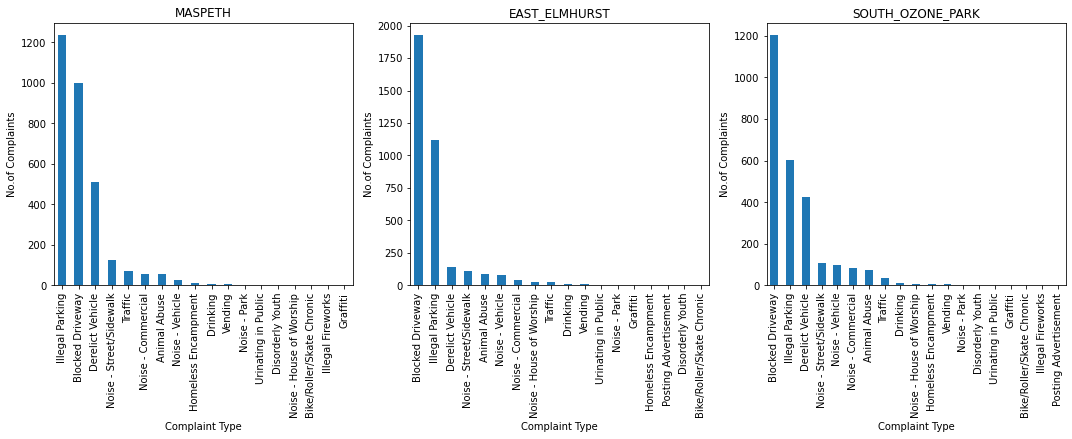

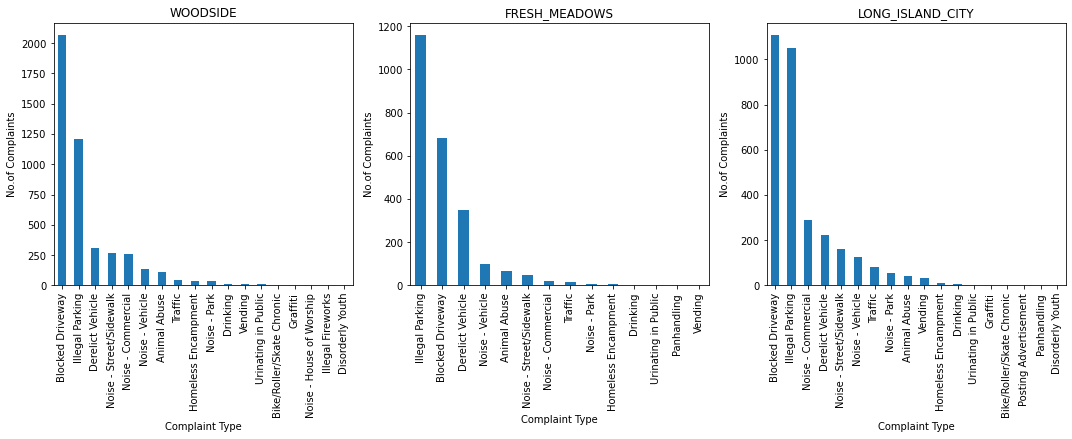

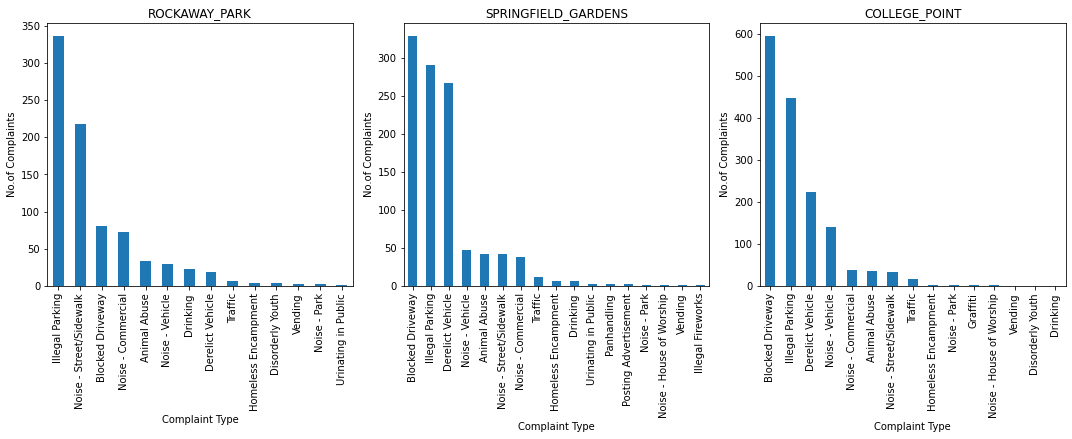

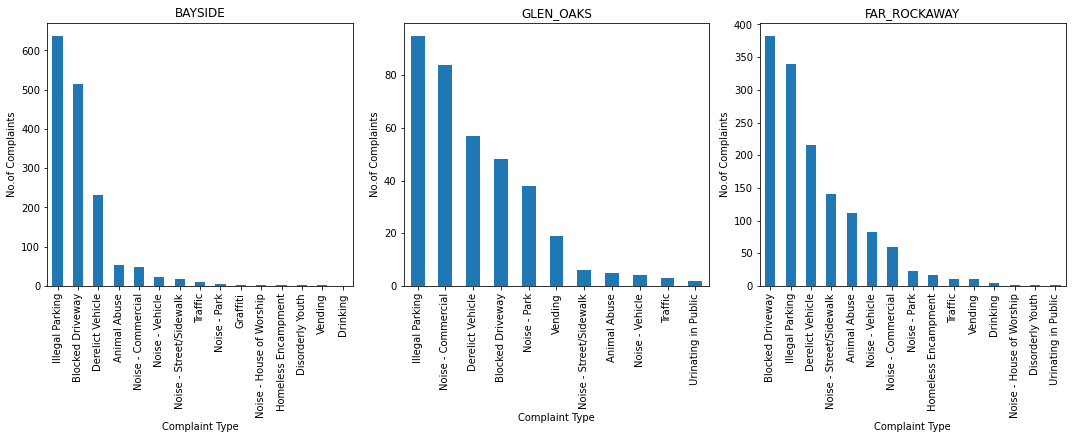

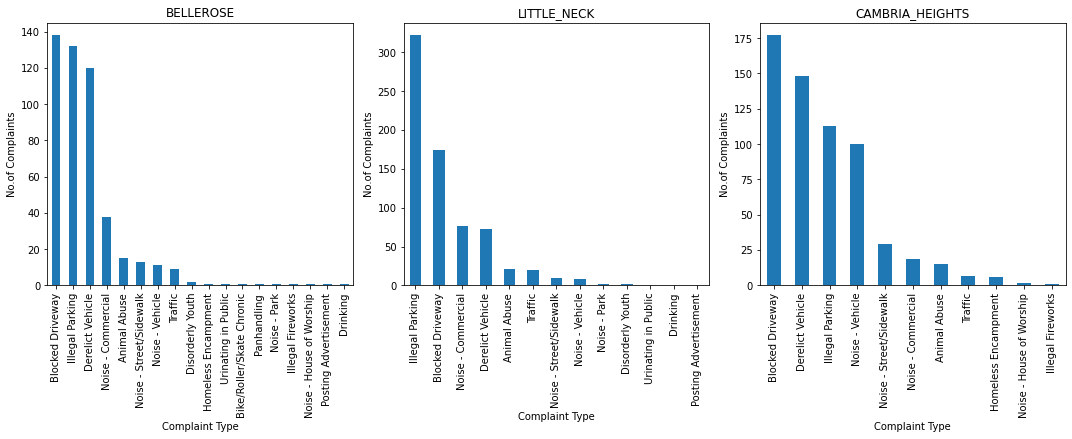

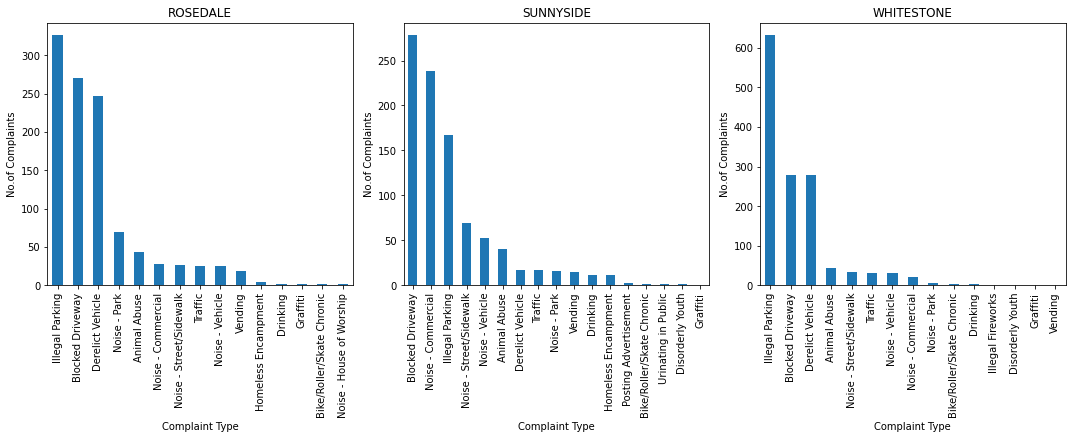

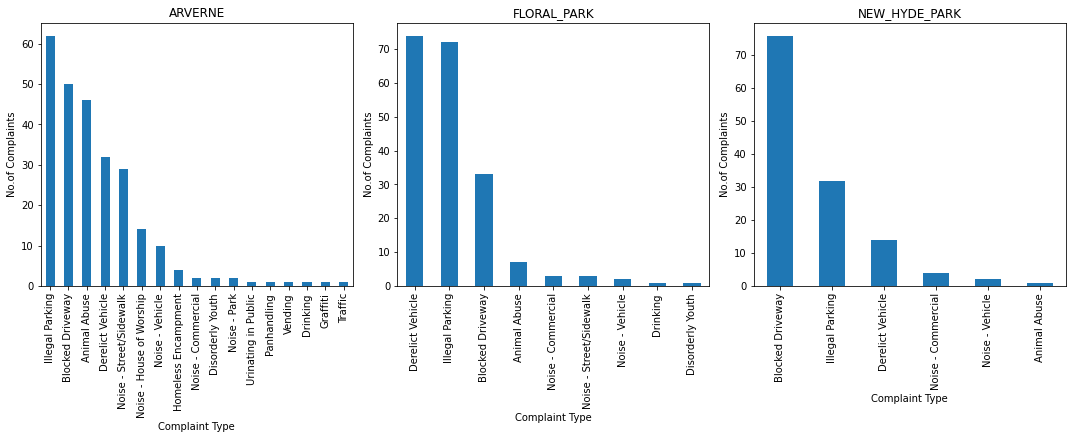

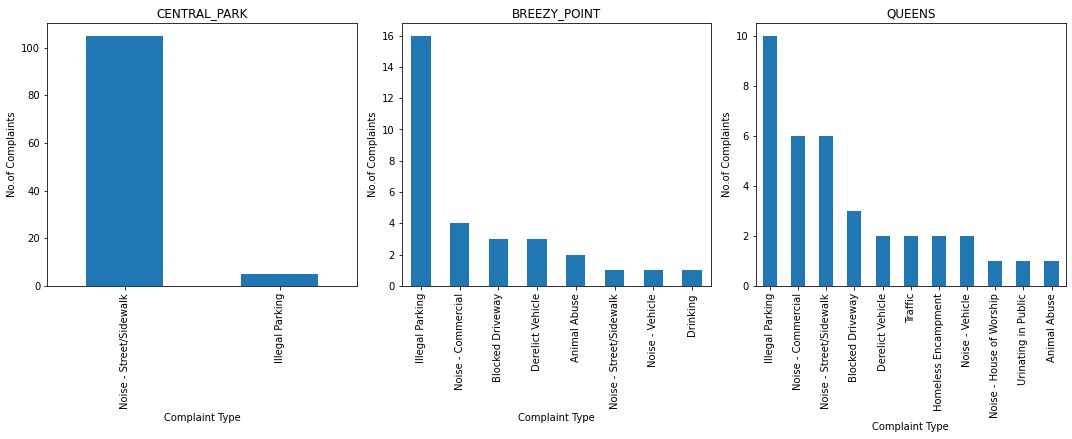

<Figure size 1080x720 with 0 Axes>

In [60]:
ix = 1
fig = plt.figure(figsize = (15,10))
df = service_requests_df.copy()
cities = service_requests_df.City.unique()
for city in cities:
    if ix <= 3:
        ax2 = fig.add_subplot(2,3,ix+3)
        ax2.tick_params(axis='x', labelrotation=90)      
        complaints_count = df.groupby(['City']).get_group(city)['Complaint_Type'].value_counts()
        complaints_count.plot.bar()
        plt.xlabel('Complaint Type')
        plt.ylabel('No.of Complaints')
        plt.title(city)   
        fig.tight_layout()
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix = 1

##### Observation:
   1. In most of the cities it is observed that most of cities have either Blocked Driveway/Illegal parking has the highest no.of complaints registered.
   2. In most of cities no complaints has been registered under Grafitti.
   3. In Central Park, only 2 types of complaints has been registered.

### 5. Average response time across various types of complaints

In [61]:
#average response time across various types of complaints
avg_closing_time_df = service_requests_df.groupby('Complaint_Type')['Request_Closing_Time_mins'].mean().fillna(0).to_frame()
avg_closing_time_df = avg_closing_time_df.sort_values(by ='Request_Closing_Time_mins',ascending=False)
avg_closing_time_df

,Request_Closing_Time_mins
Complaint_Type,
Derelict Vehicle,421.335357
Graffiti,387.939066
Animal Abuse,300.551714
Blocked Driveway,270.304239
Panhandling,262.760545
Illegal Parking,259.838052
Homeless Encampment,257.518139
Squeegee,242.670833
Vending,239.420693


<AxesSubplot:xlabel='Complaint_Type'>

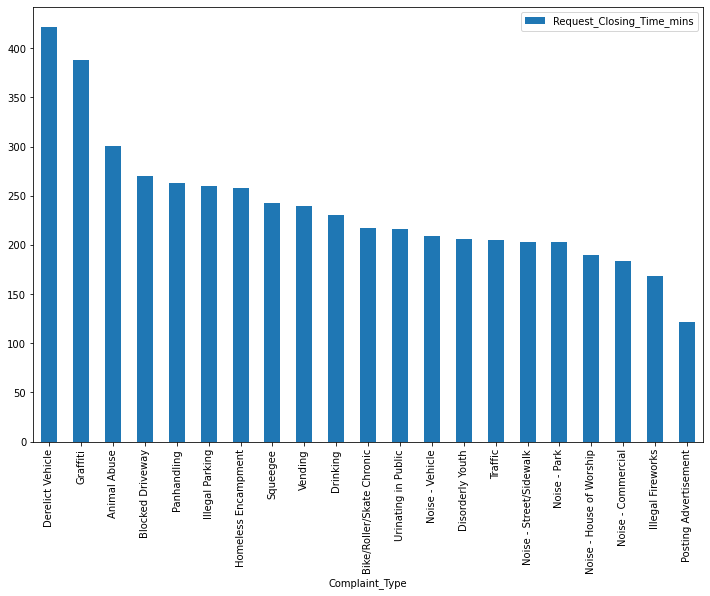

In [62]:
avg_closing_time_df.plot(kind='bar', figsize = (12,8))

### 6. Identify significant variables by performing a statistical analysis using p-values and chi-square values

##### ANOVA Analysis (Checking for top 16 complaints)
##### Null Hypothesis: The average response time across complaint types is not different
##### Alternate Hypothesis: The average response time across complaint types is different

In [63]:
complaintTypes = service_requests_df['Complaint_Type'].unique()

for i in range(len(complaintTypes)):
    exec("c{} = service_requests_df.loc[(service_requests_df['Complaint_Type'] == '{}'),'Request_Closing_Time']".format(i+1,complaintTypes[i]))

##### Observation:
   1. Using exec function we are getting the Request_closing_Time for each city.

In [64]:
import scipy.stats as stats

fscore,pvalue = stats.f_oneway(c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16)
print(fscore, pvalue)

if pvalue>0.05:
    print('Null Hypothesis is accepted')
else:
    print('Null hypothesis is rejected')

1.9848181029801544 0.01277234333101993
Null hypothesis is rejected


##### Observation:
   1. As P-value is less than 0.05, alternate hypothesis is accepted (i.e) the average response time across each complaint type is different.

##### Chi square test: Complaint Type(Category), City(Category) 
##### Are the type of complaint and city related?
##### Null Hypothesis: There is relation between city and complaint type registered.
##### Alternate Hypothesis: There is no relation between city and complaint type registered.

In [65]:
chisq = pd.crosstab(service_requests_df.City,service_requests_df.Complaint_Type)

In [66]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(chisq)
print(stat)
print(p)
print(dof)

if pvalue>0.05:
    print('Null Hypothesis is accepted')
else:
    print('Null hypothesis is rejected')

130736.14499487434
0.0
940
Null hypothesis is rejected


##### Observation:
   1. As P-value is 0, alternate hypothesis is accepted (i.e) there is no relation between city and type of complaint registered.